# Laboratorio 5: Análisis de Componentes Principales (PCA)

En este laboratorio, exploraremos el Análisis de Componentes Principales (PCA), una técnica fundamental para la reducción de dimensionalidad. PCA se utiliza ampliamente en aprendizaje automático y análisis de datos para reducir la dimensionalidad de los conjuntos de datos mientras se conserva la mayor cantidad posible de información.

## Objetivos del laboratorio

Al final de este laboratorio, serás capaz de:
1. Utilizar la funcionalidad de PCA provista por la biblioteca `sklearn`.
2. Entender las principales características de PCA.
3. Implementar PCA desde cero utilizando NumPy.
4. Aplicar PCA a un conjunto de datos y visualizar los resultados.


## 1. PCA en scikit-learn

La librería `scikit-learn` (una librería específica para aprendizaje automático) proporciona una implementación eficiente de PCA. Antes de sumergirnos en la implementación desde cero, veamos cómo usar PCA en `scikit-learn`.

El ejemplo que sigue muestra cómo utilizarla a un conjunto de datos referidos a tres especies de flores (Iris).  En total se cuenta con 150 observaciones (flores individuales) y 4 características (longitud y ancho del sépalo y pétalo).  El siguiente código muestra cómo cargar el conjunto de datos Iris y visualizarlo.



Características del conjunto de datos Iris:
Número de muestras: 150
Número de características: 4
Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases: ['setosa' 'versicolor' 'virginica']


C:\Users\juanp\AppData\Local\Temp\ipykernel_13472\2834513621.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=plt.cm.viridis(class_index / (len(iris.target_names) - 1)), label=class_name, edgecolor='k')


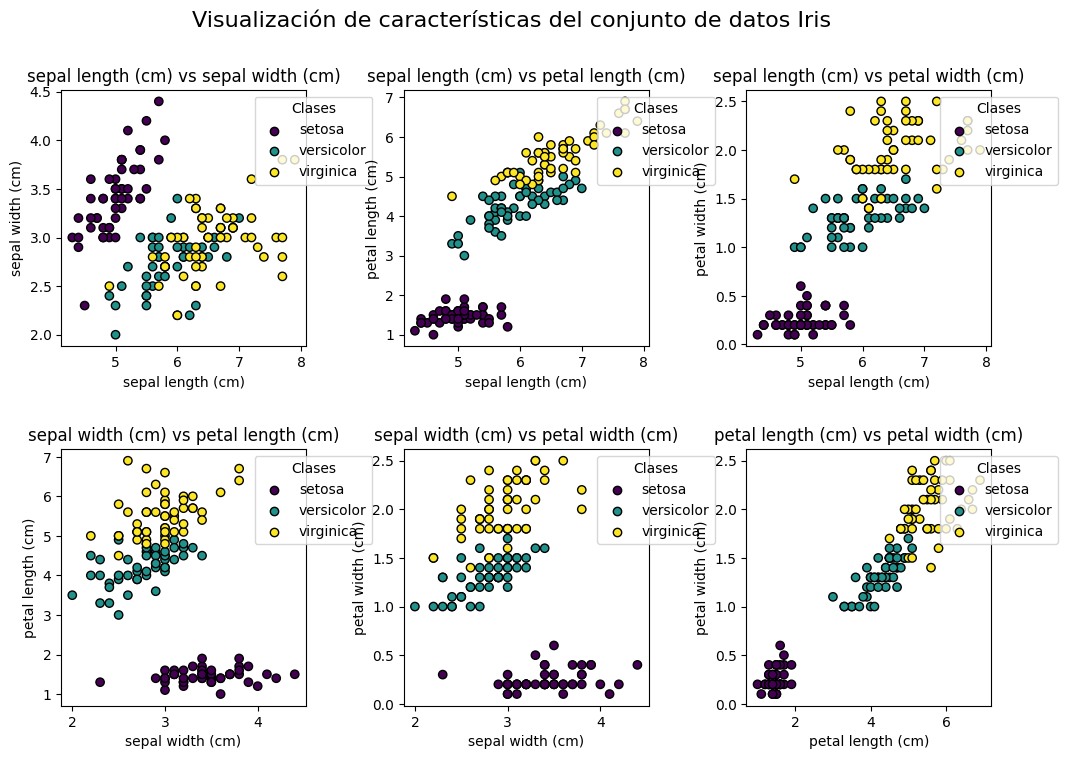

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data.T
y = iris.target

# Imprimir características del conjunto de datos
print("Características del conjunto de datos Iris:")
print("Número de muestras:", X.shape[1])
print("Número de características:", X.shape[0])
print("Características:", iris.feature_names)
print("Clases:", iris.target_names)

# Visualizar todas las características, en gráficos 2D de dos componentes a la vez
plt.figure(figsize=(12, 8))
plt.suptitle("Visualización de características del conjunto de datos Iris", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

subplot_index = 1
for i in range(X.shape[0]):
    for j in range(i + 1, X.shape[0]):
        plt.subplot(2, 3, subplot_index)
        plt.scatter(X[i,:], X[j,:], c=y, cmap='viridis', edgecolor='k')
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        plt.title(f"{iris.feature_names[i]} vs {iris.feature_names[j]}")
        # Agregar leyendas con los nombres de las clases
        for class_index, class_name in enumerate(iris.target_names):
            plt.scatter([], [], c=plt.cm.viridis(class_index / (len(iris.target_names) - 1)), label=class_name, edgecolor='k')
        plt.legend(title="Clases", loc='upper right', bbox_to_anchor=(1.3, 1))
        subplot_index += 1



Ahora procederemos a realizar PCA en el conjunto de datos Iris.  El siguiente código muestra un ejemplo de cómo hacerlo:

Proporción de varianza explicada por cada componente:
 [0.92461872 0.05306648]
Componentes principales:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Media de los datos originales
 [5.84333333 3.05733333 3.758      1.19933333]


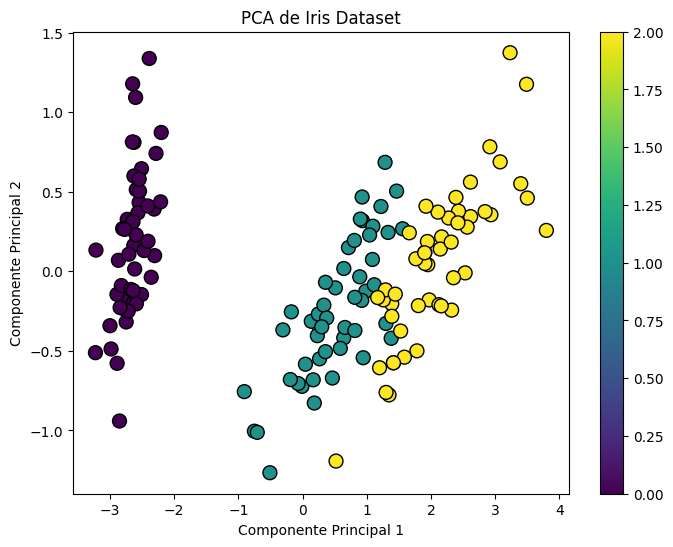

In [5]:
from sklearn.decomposition import PCA
import numpy as np

# Aplicar PCA
pca = PCA(n_components=2)  # Obtenemos 2 componentes principales
pca.fit(X.T)  # Ajustar el modelo PCA a los datos
print("Proporción de varianza explicada por cada componente:\n",pca.explained_variance_ratio_)
print("Componentes principales:\n",pca.components_)
print("Media de los datos originales\n",pca.mean_)

#Proyectar los datos originales a las nuevas dimensiones
X_pca = pca.transform(X.T).T  # Proyectar los datos originales a las nuevas dimensiones

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[0,:], X_pca[1,:], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA de Iris Dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

**Ejercicio 1.1:** Generar un cálculo equivalente al de la línea `X_pca = pca.transform(X)` utilizando operaciones matriciales básicas con `X` y `pca.components_`.  Comparar los resultados de ambos procedimientos.

In [14]:
# ----------------------------
# Ejercicio 1.1
# ----------------------------

X_pca_e = (pca.components_ @ (X - pca.mean_[:, np.newaxis])).T


## 2. Propiedades de PCA

**Ejercicio 2.1** En el código que sigue se definen funciones que chequean ciertas propiedades de la implementación de PCA. Complete la función `reconstruction_error` y corra la celda para verificar que los resultados de `sklearn.decomposition.PCA` son consistentes con lo visto en clase.


In [ ]:
import numpy as np

def reconstruction_error(X, principal_components): #COMPLETAR ESTA FUNCIÓN
    k_max = principal_components.shape[0]
    reconstruction_errors = np.zeros(k_max + 1)
    # Centrar los datos
    X_demeaned = X - np.mean(X, axis=1, keepdims=True)
    reconstruction_errors[0] = np.mean(X_demeaned ** 2)  # Error de reconstrucción para k=0
    for k in range(1, k_max + 1):
        # Proyectar los datos en los primeros k componentes principales
        X_projected = principal_components[:k] @ (X_demeaned)
        
        # Reconstruir los datos a partir de la proyección
        X_reconstructed = principal_components[:k].T @ X_projected
        
        # Calcular el error de reconstrucción
        reconstruction_errors[k] = np.mean((X_demeaned - X_reconstructed) ** 2)
        print(f"Error de reconstrucción para k={k}:", reconstruction_errors[k])
    return reconstruction_errors


# Test 1: ortogonalidad de los vectores propios
#Escriba una función que reciba las componentes principales como una matriz k x d 
#verifique que los vectores propios son ortogonales entre sí. Para ello, calcule 
# el producto punto entre cada par de vectores propios y compare con la matriz identidad.
def test_ortogonalidad(principal_components):
    # Verificar la ortogonalidad de los vectores propios
    producto_punto = principal_components @ principal_components.T
    identity_matrix = np.eye(producto_punto.shape[0])
    assert np.allclose(producto_punto, identity_matrix), "Los vectores propios no son ortogonales"
    print("Los vectores propios son ortogonales")

# Test 2: valores propios ordenados
#Escriba una función que reciba los valores propios y verifique que están ordenados de mayor a menor.
def test2(variance_explained):
    # Verificar que los valores propios están ordenados de mayor a menor
    assert np.all(variance_explained[:-1] >= variance_explained[1:]), "Los valores propios no están ordenados correctamente"
    print("Los valores propios están ordenados correctamente")

# Test 3: reconstrucción de datos
#Escriba una función que reciba los datos originales (matrix X de dimensiones d x n), 
# las componentes principales como una matriz k x d y los valores propios como un vector de longitud k.
# Calcule el error de reconstrucción para cada k y verifique que el error de reconstrucción
# disminuye a medida que aumenta k. 
def test3(X, principal_components):
    reconstruction_errors = reconstruction_error(X, principal_components)
    # Verificar que el error de reconstrucción disminuye a medida que aumenta k
    assert np.all(reconstruction_errors[:-1] >= reconstruction_errors[1:]), "El error de reconstrucción no disminuye con k"
    print("El error de reconstrucción disminuye con k")

# Test 4: reconstrucción de datos y varianza explicada
#Escriba una función que reciba los datos originales (matriz X de dimensiones d x n), 
# las componentes principales como una matriz k x d y los valores propios como un vector de longitud k.
#verifique que el error de reconstrucción coincide con la relación esperada.
# La relación esperada es que el error de reconstrucción para k componentes principales
def test4(X, principal_components, variance_explained):
    reconstruction_errors = reconstruction_error(X, principal_components)
    # Verificar que el error de reconstrucción coincide con la relación esperada
    assert np.allclose(reconstruction_errors[1:] / reconstruction_errors[0], 1-np.cumsum(variance_explained)), "El error de reconstrucción no coincide con la relación esperada"
    print("El error de reconstrucción coincide con la relación esperada")

# Correr los tests con los resultados de PCA sobre Iris
test_ortogonalidad(pca.components_)
test2(pca.explained_variance_ratio_)
test3(X, pca.components_)
test4(X, pca.components_, pca.explained_variance_ratio_)

Los vectores propios son ortogonales
Los valores propios están ordenados correctamente
Error de reconstrucción para k=1: 0.08560430966800887
Error de reconstrucción para k=2: 0.025341073932398255
El error de reconstrucción disminuye con k
Error de reconstrucción para k=1: 0.08560430966800887
Error de reconstrucción para k=2: 0.025341073932398255
El error de reconstrucción coincide con la relación esperada


# 3. Implementación de PCA desde cero

En esta sección, implementaremos PCA desde cero utilizando NumPy.  

**Ejercicio 3.1:** Implemente la función `pca` que calcula los componentes principales de un conjunto de datos.  La función debe devolver los componentes principales y la varianza explicada por cada componente.

**Ejercicio 3.2:** Compare los resultados de su función y la implementación de `sklearn.decomposition.PCA` para una matriz aleatoria de tamaño 10x1000.  Asegúrese de que los resultados sean consistentes.

In [23]:
# ----------------------------------
# Ejercicio 3.1
# ----------------------------------

def pca(X, k):
    # Centrar los datos
    X_demeaned = X - np.mean(X, axis = 0)

    # Calcular la matriz de covarianza
    S = S = np.cov(X_demeaned, rowvar=False)


    # Calcular los valores y vectores propios
    eigenvalues, eigenvectors = np.linalg.eigh(S)

    # Ordenar los valores y vectores propios
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Seleccionar los k primeros vectores propios
    principal_components = eigenvectors[:, :k]
    print(principal_components)

    # Proyectar los datos originales a las nuevas dimensiones
    X_pca = X_demeaned @ principal_components


    # Calcular la varianza explicada
    total_variance = np.sum(eigenvalues)
    variance_explained = np.cumsum(eigenvalues[:k]) / total_variance

    return X_pca, principal_components, variance_explained


# Matriz aleatoria 10x1000
X = np.random.rand(10, 1000)

# Aplicar tu PCA
X_pca_custom, pcs_custom, var_exp_custom = pca(X, k=5)

# Aplicar PCA de sklearn
pca_sklearn = PCA(n_components=5)
X_pca_sklearn = pca_sklearn.fit_transform(X)

# Comparaciones
print("¿Proyecciones similares?:", np.allclose(np.abs(X_pca_custom), np.abs(X_pca_sklearn), atol=1e-5))
print("¿Componentes similares?:", np.allclose(np.abs(pcs_custom), np.abs(pca_sklearn.components_.T), atol=1e-5))
print("Varianza explicada personalizada:", var_exp_custom)
print("Varianza explicada sklearn:", np.cumsum(pca_sklearn.explained_variance_ratio_))


[[ 0.0256578   0.00345321  0.04136366 -0.00290625  0.01831091]
 [ 0.00459515 -0.03574936  0.01160084  0.04822798  0.00312804]
 [ 0.01955837  0.03628963  0.00387615  0.00010379  0.03331487]
 ...
 [ 0.02722113 -0.02477829  0.0744496  -0.02038456 -0.02020787]
 [-0.00198928  0.02122227 -0.03742435 -0.03522591  0.06073234]
 [-0.00976211 -0.03795228 -0.01181187  0.03237612 -0.03543807]]
¿Proyecciones similares?: True
¿Componentes similares?: True
Varianza explicada personalizada: [0.12490593 0.24769831 0.36469638 0.47805206 0.58936794]
Varianza explicada sklearn: [0.12490593 0.24769831 0.36469638 0.47805206 0.58936794]


# 4. PCA para compresión en un conjunto de datos de imágenes
En esta sección, aplicaremos PCA a un conjunto de datos de imágenes.  Utilizaremos el conjunto de datos `MNIST` que contiene imágenes de dígitos (del 0 al 9) escritos a mano.  Este dataset es ampliamente utilizado en la comunidad de aprendizaje automático y visión por computadora.  Cada imagen tiene un tamaño de 28x28 píxeles, lo que equivale a 784 características (una para cada píxel).  

Este conjunto de datos fue generado por el Instituto Nacional de Estándares y Tecnología (NIST) de EE.UU. Originalmente, el conjunto de datos fue creado para la competencia de reconocimiento de dígitos escritos a mano, con el propósito de digitalizar formularios y documentos escritos a mano (cheques, formularios de impuestos, etc.) durante la década de 1980.  El conjunto de datos MNIST es una versión más pequeña y simplificada del conjunto de datos original NIST.

El código siguiente carga el conjunto de datos MNIST y visualiza algunos ejemplos.

Tamaño del conjunto de datos MNIST:
Número de muestras de entrenamiento: 60000
Número de muestras de prueba: 10000
Dimensiones de las imágenes: (28, 28)
Número de clases: 10
Dimensiones de X_mnist: (784, 60000)
Dimensiones de y_mnist: (60000,)


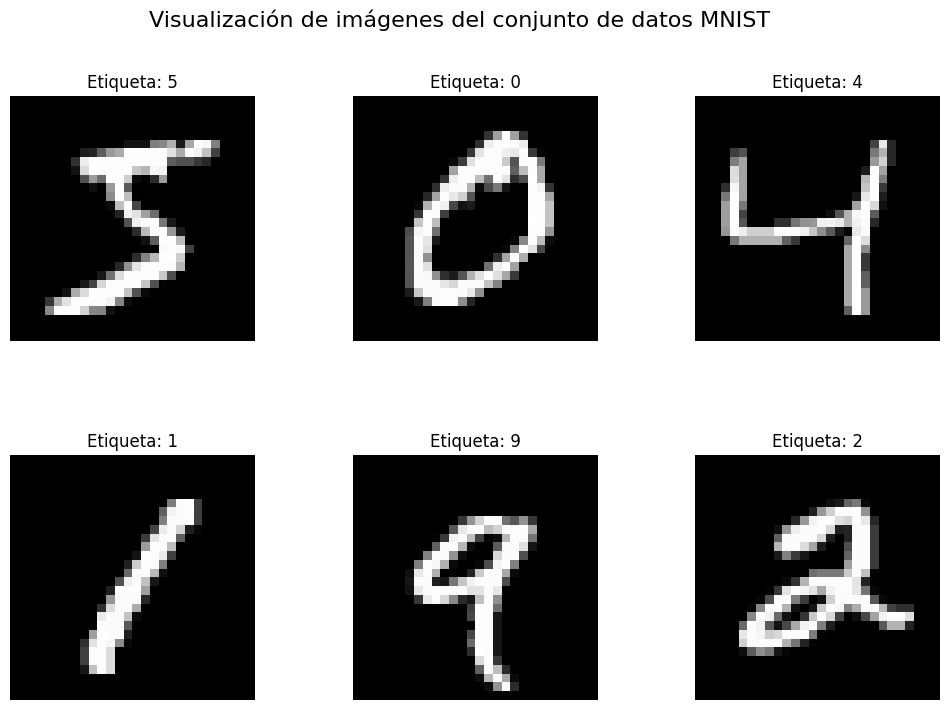

In [25]:
# Cargar el conjunto de datos MNIST
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("Tamaño del conjunto de datos MNIST:")
print("Número de muestras de entrenamiento:", X_train.shape[0])
print("Número de muestras de prueba:", X_test.shape[0])
print("Dimensiones de las imágenes:", X_train.shape[1:])
print("Número de clases:", len(np.unique(y_train)))


X_mnist = X_train.reshape(X_train.shape[0], -1).T  # Aplanar las imágenes de entrenamiento
y_mnist = y_train  # Etiquetas de las imágenes de entrenamiento
print("Dimensiones de X_mnist:", X_mnist.shape)
print("Dimensiones de y_mnist:", y_mnist.shape)

# Visualizar algunas imágenes del conjunto de datos MNIST
plt.figure(figsize=(12, 8))
plt.suptitle("Visualización de imágenes del conjunto de datos MNIST", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
subplot_index = 1
for i in range(6):
    plt.subplot(2, 3, subplot_index)
    plt.imshow(X_mnist[:, i].reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta: {y_mnist[i]}")
    plt.axis('off')
    subplot_index += 1
plt.show()


**Ejercicio 4.1: Las componentes principales como vectores interpretables** Calcule PCA sobre el conjunto de datos MNIST y visualice los primeros 10 componentes principales como imágenes.  

**Ejercicio 4.2: PCA como herramienta de compresión** Utilice PCA para reducir la dimensionalidad del conjunto de datos MNIST a 50 dimensiones.  Elija un conjunto de 5 imágenes al azar, y visualice lado a lado: la imagen original y la imagen reconstruída a partir de 10, 20 y 50 componentes principales.  Comente sobre la calidad de la reconstrucción y la cantidad de información perdida al reducir la dimensionalidad.  Calcule los factores de compresión de datos obtenidos en cada caso.

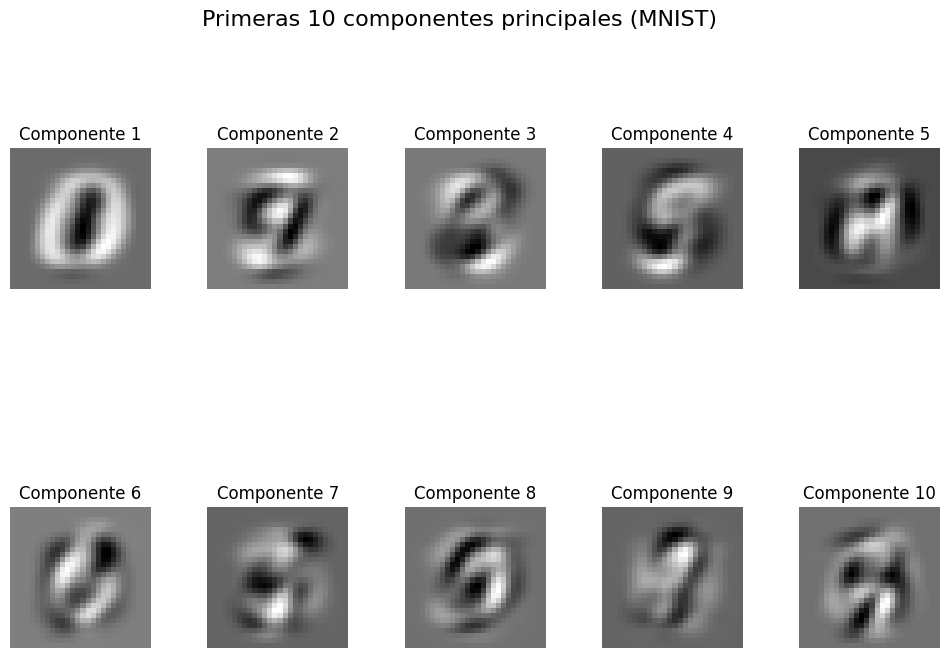

In [29]:
# Aplicar PCA al conjunto de datos MNIST
pca_mnist = PCA(n_components=10)
pca_mnist.fit(X_mnist.T)

# Visualizar las primeras 10 componentes principales como imágenes
plt.figure(figsize=(12, 8))
plt.suptitle("Primeras 10 componentes principales (MNIST)", fontsize=16)
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(pca_mnist.components_[i].reshape(28, 28), cmap='gray')
    plt.title(f"Componente {i + 1}")
    plt.axis('off')

plt.show()



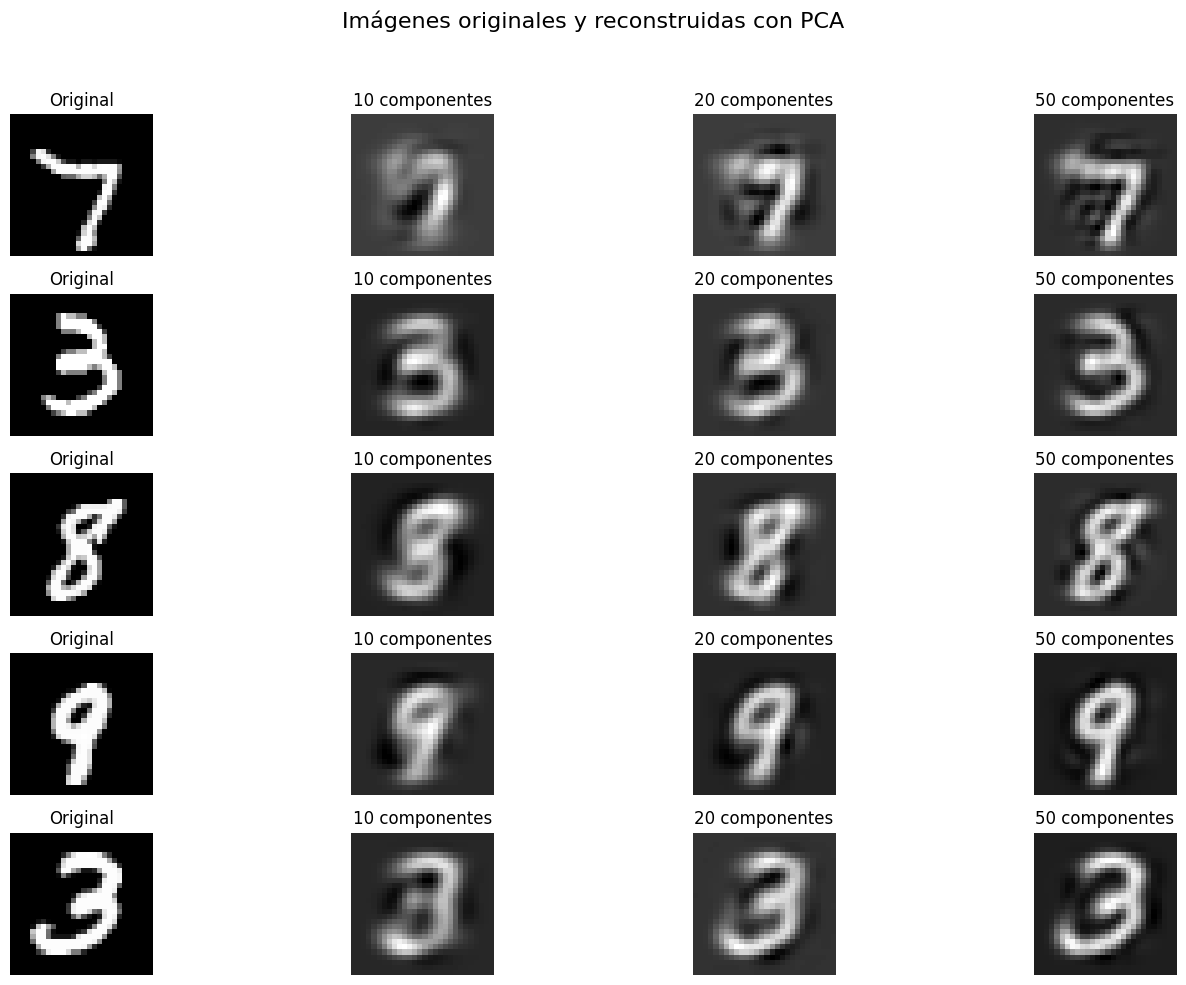

Factor de compresión con 10 componentes: 78.40
Factor de compresión con 20 componentes: 39.20
Factor de compresión con 50 componentes: 15.68


In [30]:
# Reducir la dimensionalidad del conjunto de datos MNIST a 50 dimensiones
pca_mnist_50 = PCA(n_components=50)
X_mnist_pca_50 = pca_mnist_50.fit_transform(X_mnist.T)

# Reconstruir las imágenes a partir de 10, 20 y 50 componentes principales
pca_mnist_10 = PCA(n_components=10)
X_mnist_pca_10 = pca_mnist_10.fit_transform(X_mnist.T)
X_mnist_reconstructed_10 = pca_mnist_10.inverse_transform(X_mnist_pca_10)

pca_mnist_20 = PCA(n_components=20)
X_mnist_pca_20 = pca_mnist_20.fit_transform(X_mnist.T)
X_mnist_reconstructed_20 = pca_mnist_20.inverse_transform(X_mnist_pca_20)

X_mnist_reconstructed_50 = pca_mnist_50.inverse_transform(X_mnist_pca_50)

# Seleccionar 5 imágenes al azar
np.random.seed(42)
random_indices = np.random.choice(X_mnist.shape[1], 5, replace=False)

# Visualizar las imágenes originales y reconstruidas
plt.figure(figsize=(15, 10))
plt.suptitle("Imágenes originales y reconstruidas con PCA", fontsize=16)

for i, idx in enumerate(random_indices):
    # Imagen original
    plt.subplot(5, 4, i * 4 + 1)
    plt.imshow(X_mnist[:, idx].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstrucción con 10 componentes principales
    plt.subplot(5, 4, i * 4 + 2)
    plt.imshow(X_mnist_reconstructed_10[idx].reshape(28, 28), cmap='gray')
    plt.title("10 componentes")
    plt.axis('off')

    # Reconstrucción con 20 componentes principales
    plt.subplot(5, 4, i * 4 + 3)
    plt.imshow(X_mnist_reconstructed_20[idx].reshape(28, 28), cmap='gray')
    plt.title("20 componentes")
    plt.axis('off')

    # Reconstrucción con 50 componentes principales
    plt.subplot(5, 4, i * 4 + 4)
    plt.imshow(X_mnist_reconstructed_50[idx].reshape(28, 28), cmap='gray')
    plt.title("50 componentes")
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Calcular factores de compresión
original_size = X_mnist.shape[0]  # 784 características por imagen
compressed_size_10 = 10  # 10 componentes principales
compressed_size_20 = 20  # 20 componentes principales
compressed_size_50 = 50  # 50 componentes principales

compression_factor_10 = original_size / compressed_size_10
compression_factor_20 = original_size / compressed_size_20
compression_factor_50 = original_size / compressed_size_50

print(f"Factor de compresión con 10 componentes: {compression_factor_10:.2f}")
print(f"Factor de compresión con 20 componentes: {compression_factor_20:.2f}")
print(f"Factor de compresión con 50 componentes: {compression_factor_50:.2f}")